In [1]:
import pandas as pd

x = pd.read_csv( "data.csv" )
y = pd.read_csv( "labels.csv" )

In [2]:
print(x.head())

  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [3]:
x = x.drop(columns=x.columns[0], axis=1)

In [4]:
y = y.drop(columns=y.columns[0], axis=1)

In [5]:
print(x.isnull().sum())
#No Null Values

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64


In [6]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB
None


In [7]:
threshold = 0.8
x = x.loc[:, (x == 0).mean() <= threshold]

print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 18789 entries, gene_1 to gene_20529
dtypes: float64(18789)
memory usage: 114.8 MB
None


Unique values and their frequencies in 'target' : 
Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
Name: count, dtype: int64


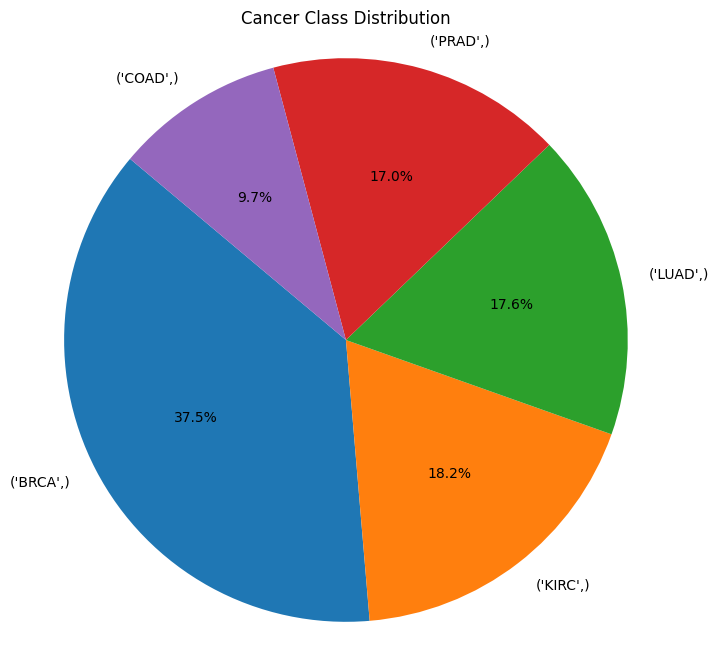

In [8]:
import matplotlib.pyplot as plt

value_counts = y.value_counts()
print("Unique values and their frequencies in 'target' : ")
print(value_counts)
class_counts = y.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancer Class Distribution')
plt.axis('equal')  
plt.show()

In [9]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Ensure all features are non-negative 
scaler = MinMaxScaler()
Xn = scaler.fit_transform(x)

chi2_selector = SelectKBest(score_func=chi2, k=10000)
X = chi2_selector.fit_transform(x, y)
selected_features = x.columns[chi2_selector.get_support()]

print(f"Top {10000} selected features based on chi2:\n{selected_features}")
chi2_scores = pd.DataFrame({
    'Feature': x.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)
print(chi2_scores)


Top 10000 selected features based on chi2:
Index(['gene_1', 'gene_2', 'gene_10', 'gene_13', 'gene_14', 'gene_18',
       'gene_19', 'gene_20', 'gene_25', 'gene_26',
       ...
       'gene_20499', 'gene_20500', 'gene_20501', 'gene_20504', 'gene_20507',
       'gene_20514', 'gene_20519', 'gene_20520', 'gene_20524', 'gene_20529'],
      dtype='object', length=10000)
          Feature   Chi2 Score
8679    gene_9176  8580.566498
8678    gene_9175  7363.380532
14649  gene_15898  6902.074640
205      gene_220  6333.703681
204      gene_219  6259.461507
...           ...          ...
10075  gene_10765     0.094126
4479    gene_4718     0.082549
400      gene_427     0.079145
13102  gene_14282     0.059818
7642    gene_8093     0.050834

[18789 rows x 2 columns]


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None) 
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

n_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape after PCA: {X_reduced.shape}")


Number of components to explain 95% variance: 516
Original shape: (801, 10000)
Reduced shape after PCA: (801, 516)


In [11]:
from sklearn.model_selection import train_test_split

Xt, Xtest, Yt, Ytest = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model =  DecisionTreeClassifier()
model.fit(Xt, Yt)
y_pred = model.predict(Xtest)

accuracy = accuracy_score(Ytest, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
m = confusion_matrix(Ytest, y_pred)
print(m)
print("\nClassification Report:")
print(classification_report(Ytest, y_pred))


Accuracy: 95.44%

Confusion Matrix:
[[83  0  3  4  0]
 [ 0 28  0  0  0]
 [ 0  0 40  0  1]
 [ 1  0  1 38  0]
 [ 0  0  0  1 41]]

Classification Report:
              precision    recall  f1-score   support

        BRCA       0.99      0.92      0.95        90
        COAD       1.00      1.00      1.00        28
        KIRC       0.91      0.98      0.94        41
        LUAD       0.88      0.95      0.92        40
        PRAD       0.98      0.98      0.98        42

    accuracy                           0.95       241
   macro avg       0.95      0.96      0.96       241
weighted avg       0.96      0.95      0.95       241



In [22]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import numpy as np

model =  DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_reduced, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


Cross-validation scores: [0.97515528 0.975      0.975      0.96875    0.9375    ]
Mean accuracy: 0.9662810559006211
